Here, we have a dataset of customers on which we will be performing a very simple clustering analysis...

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
dataset = pd.read_csv('customers.csv')

X = dataset[['Age', 'Education','Sex','Marital status', 'Occupation', 'Settlement size']].values
y_income = dataset['Income']
print(X, y_income)

X_train, X_test, y_income_train, y_income_test = train_test_split(X, y_income, test_size=0.2)

[[67  2  0  0  1  2]
 [22  1  1  1  1  2]
 [49  1  0  0  0  0]
 ...
 [31  0  0  0  0  0]
 [24  1  1  1  0  0]
 [25  0  0  0  0  0]] 0       124670
1       150773
2        89210
3       171565
4       149031
         ...  
1995    123525
1996    117744
1997     86400
1998     97968
1999     68416
Name: Income, Length: 2000, dtype: int64


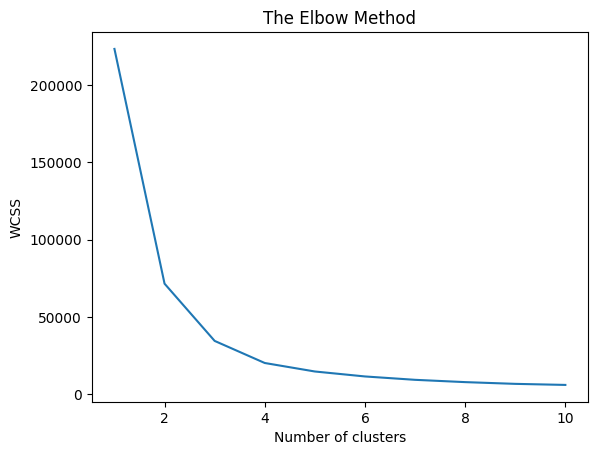

In [21]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# The ideal number of clusters seems to be 3 or 4. Let's try 3 clusters...
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)
print(y_kmeans[:40])

[2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 1 0 2 0 2 1 0 0 2 0 2 0 1 2 2 0 2
 2 0 2]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


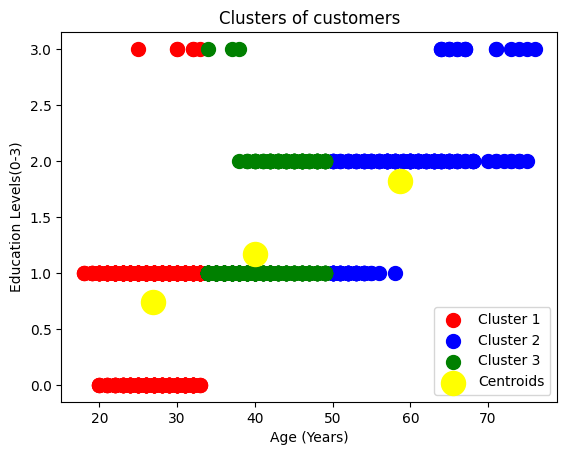

In [23]:
# Visualising the clusters

plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')




plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age (Years)')
plt.ylabel('Education Levels(0-3)')
plt.legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model using the training data
regressor.fit(X_train, y_income_train)

# Predict income for the test data
y_income_pred = regressor.predict(X_test)

# Evaluate the model (you can use appropriate regression evaluation metrics)
# For instance, you can calculate the Mean Absolute Error (MAE) or R-squared (R2).
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_income_test, y_income_pred)
r2 = r2_score(y_income_test, y_income_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 19509.707554177912
R-squared (R2): 0.44473104065229574
